# Exercises for Week 5: Simulation Modeling


## Grading Scheme:
Important: This Jupyter notebook needs to be completed and submitted via Blackboard before the due date to receive a non-zero grade.

- 5: Every question is completed and the code returns the correct outputs on all of the sample inputs. **For questions involving randomness, your outputs only need to match the sample outputs qualitatively, as your exact plots and estimates will be slightly different.**
- 4: Almost complete, but certain questions are blank, returns clearly incorrect outputs, or the code there does not run at all.
- 3: This score will not be assigned, as everyone should strive to get 4 or 5.
- 2: Not close to complete, but at least 50% complete.
- 1: At least 10% complete, but less than 50% complete
- 0: Less than 10% complete, or response is identical to someone else's, indicating plagiarism.

A perfect score is 5. Note that your code does not need to be absolutely perfect to receive a 5, but you need to complete every question and ensure that the outputs are correct on all of the sample runs included here. **To ensure that you get 5 out of 5, before you submit, restart the Kernel and run all, and check that all of the outputs are as intended.**

These exercises are intended to be completed in 6-8 hours, including the individual-work time in class. You should budget at least this much time before the due date.

## Name: Gabrielle Felder

## Exercise 5.1: Sampling from Simple Distributions

**a)** Generate 100,000 samples from a uniform distribution between 1 and 3, and plot the histogram with 20 bins, as below.

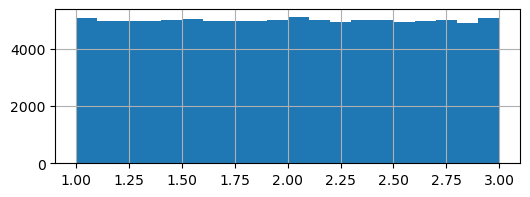

In [18]:
# Sample output

<Axes: >

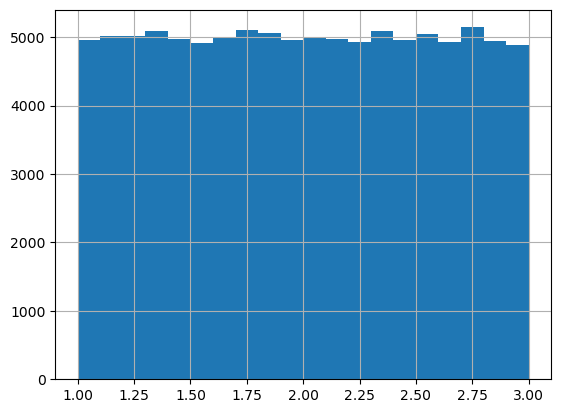

In [3]:
# Write your code here
from numpy.random import default_rng
rng = default_rng()


import pandas as pd
pd.Series(rng.uniform(1,3, size = 100000)).hist(bins=20)


**b)** Generate 100,000 samples from a geometric probability with $p=0.3$, and plot the histogram with 50 bins, as below.

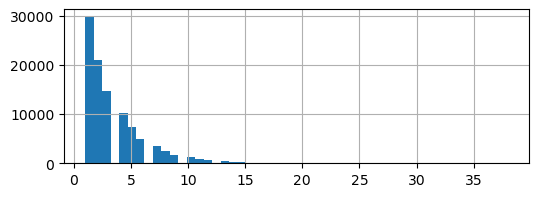

In [19]:
# Sample output

<Axes: >

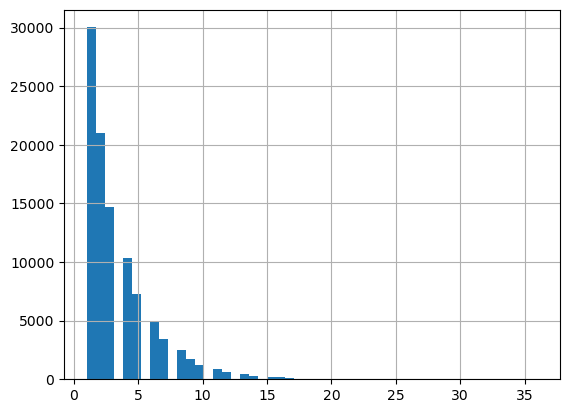

In [8]:
# Write your code here
pd.Series(rng.geometric(0.3, size = 100000)).hist(bins=50)


**c)** Suppose that the number of customers arriving to a grocery store every $10$ minutes is Poisson distributed with mean $8.5$. Estimate the chance that the number of arrivals in a given 10 minute interval is 15 or higher.

**Hint:** Generate 1,000,000 samples from the Poisson distribution and calculate the proportion of samples that are at least 15 using vectorized operations.

In [20]:
# Sample output (your answer might be slightly different due to randomness)

0.027572

In [7]:
# Write your code here

(rng.poisson(8.5, size = 1000000) >= 15).mean()

0.027578

**d)** Suppose there are two products, and a customer's willingness to pay for each of the two products are drawn independently from the following distributions:

- Product 1: Normal(25,10)
- Product 2: Normal(20,15)

Estimate the proportion of customers whose willingness to pay is higher for the second product than the first, AND whose willingness to pay for the second product is at least zero. 

**Hint:** Draw 1,000,000 samples from each distribution and compare the two Series using vectorized operations based on the above logic.

In [21]:
# Sample output (your answer might be slightly different due to randomness)

0.390713

In [15]:
# Write your code here

n = 10
prod1 = (rng.normal(25,10, size = n))
prod2 = (rng.normal(20,15, size = n))

In [12]:
prod1

array([30.2874369 , 28.63100539, 14.8622749 ,  9.22003765, 33.52364787,
       18.65073232, 23.84042357, 25.04762136, 24.02987896, 12.12972676])

In [16]:
prod2

array([ 5.43063551, 44.02593926, -1.73816603, 10.07860713, 25.61494944,
        8.37990914, 10.93402766, 35.84013182, 23.9757606 , 11.30616735])

In [17]:
((prod2>prod1)&(prod2>=0)).mean()

0.4

In [20]:
n = 1000000
prod1 = (rng.normal(25,10, size = n))
prod2 = (rng.normal(20,15, size = n))
((prod2>prod1)&(prod2>=0)).mean()

0.390722

## Exercise 5.2: Accounting for Uncertain Product Quality when Forecasting Demand

You are tasked with forecasting demand for a new product. Based on past data and your knowledge of the product, you estimate that the product quality will be Amazing with probability 0.1, Mediocre with probability 0.5, and Terrible with probability 0.4. You model the demand as normally distributed, with mean and standard deviation dependent on the product quality as follows.

| Prod. Quality: | Amazing | Mediocre | Terrible |
|--|--|--|--|
|mean| 10000 | 5000 | 1000 |
|standard deviation| 2000 | 1000 | 300 |

Create a `Series` called "forecast" with 10,000 samples of the demand forecast, and compute the mean and standard deviation of the samples, as well as the probability that demand is more than 6000. Finally, plot a histogram of the samples with 100 bins. (For this question, you can ignore the constraint that demand should be integer and non-negative.) Due to randomness, your estimates and plot may be slightly different, but they should be roughly the same as the sample output below.

Sample mean: 3875.9049161561243
Sample standard deviation: 2922.1347999073378
Probability demand more than 6000: 0.1771


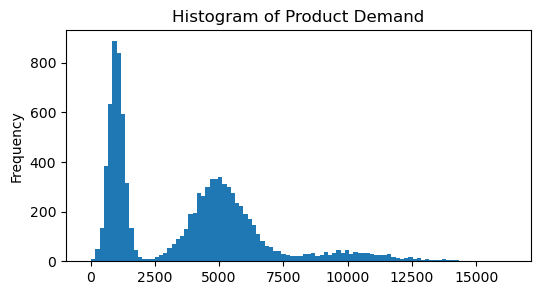

In [25]:
# Sample output (your answer might be slightly different due to randomness)

In [26]:
import matplotlib.pyplot as plt

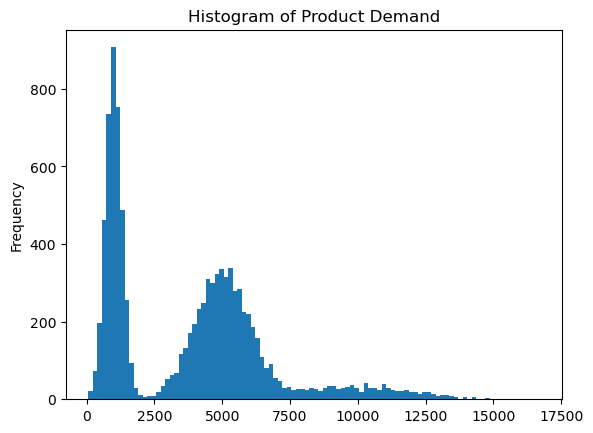

Sample standard deviation: 2933.153996204781
Sample mean: 3884.3059704357447
Probability demand greater than 6000: 0.1754


In [35]:
# Write your code here
data = []
for i in range(10000):
    product = rng.choice(['Amazing', 'Mediocore', 'Terrible'], p = [0.1, 0.5, 0.4])
    if product == 'Amazing':
        data.append(rng.normal(10000, 2000))
    elif product == 'Mediocore':
        data.append(rng.normal(5000,1000))
    else:
        data.append(rng.normal(1000,300))
forecast = pd.Series(data)
forecast.plot(kind = 'hist', bins = 100, title = 'Histogram of Product Demand')
plt.show()
sample_mean = forecast.mean()
sample_std = forecast.std()
prob = (forecast>6000).mean()
print(f'Sample standard deviation: {sample_std}')
print(f'Sample mean: {sample_mean}')
print(f'Probability demand greater than 6000: {prob}')



## Exercise 5.3: Simulating Serially Correlated Demand

A logistic company would like to simulate demand for a given product. Assume that there are Good or Bad weeks. On a Good week, the demand is Normally distributed with mean $300$ and standard deviation $50$. On a Bad week, demand is Normally distributed with mean $100$ and standard deviation $30$. Moreover, you should round the demand to the nearest integer and set it to zero if it is ever negative.

Whether a week is Good or Bad is not independent across time. Conditional on a given week being Good, the next week remains Good with probability $0.95$. Similarly, conditional on a given week being Bad, the next week remains Bad with probability $0.95$. 

Write a function called `generate_demand` with one input argument:

- **n**: the number of weeks to simulate.

The function should return a list of simulated demand for n weeks, assuming that the first week is Good.

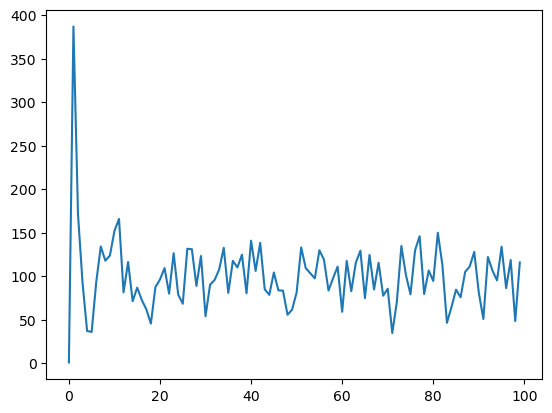

In [36]:
n = 100
data = [rng.binomial(1, 0.5)]
for i in range(1,n):
    if data[-1] == 1:
        data.append(rng.normal(300,50))
    else:
        data.append(rng.normal(100,30))
s = pd.Series(data)
s.plot()
plt.show()

In [ ]:
n = 100
data = [rng.binomial(1, 0.5)]
for i in range(1,n):
    if data[-1] == 1:
        data.append(rng.normal(300,50))
    else:
        data.append(rng.normal(100,30))
        
    
s = pd.Series(data)
s.plot()
plt.show()

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


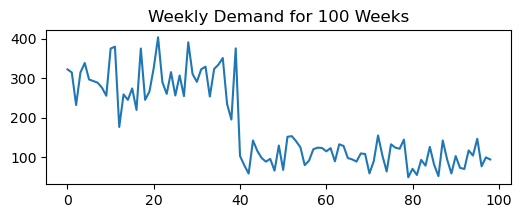

In [66]:
#probability of good vs bad
n = 100
data = [rng.binomial(1, 0.5)]
data_1 = []
for i in range(1,n):
    if data[-1] == 1:
        demand ='Good'
        data.append(rng.binomial(1, 0.95))
    else:
        demand = 'Bad'
        data.append(rng.binomial(0, 0.05))
   #x for normal dist for good and bad 
    if demand == 'Good':
        data_1.append(rng.normal(300,50))
    else:
        data_1.append(rng.normal(100,30))
s = pd.Series(data_1)
s.plot(title='Weekly Demand for 100 Weeks',figsize=(6,2))
plt.show()

    

In [ ]:
n = 100
data = []
for i in range(1,n):
    demand = rng.choice(['Good', 'Bad'], p = [0.5, 0.5])
    if demand == 'Good':
        data.append(rng.normal(300,50))
        
    else:
        data.append(rng.normal(100,30))
s = pd.Series(data)
s.plot()
plt.show()

In [87]:
n = 100
data = [rng.choice(['Good', 'Bad'], p = [0.5, 0.5])]
demand = []
for i in range(1,n):
    if data[-1] == 'Good':
        data.append(rng.choice(['Good', 'Bad'], p = [0.95, 0.05]))
    else:
        data.append(rng.choice(['Good', 'Bad'], p = [0.05, 0.95]))
   #x for normal dist for good and bad 
    if data == 'Good':
        demand.append(rng.normal(300,50))
    else:
        demand.append(rng.normal(100,30))
print(data)

['Good', 'Good', 'Bad', 'Bad', 'Bad', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Good', 'Good', 'Good', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Good', 'Good', 'Good', 'Good', 'Bad', 'Bad', 'Bad', 'Bad']


In [108]:
# Write your code here
def generate_demand(n):
    week = ['Good']
    demand = []
    for i in range(1,n):
        if week[-1] == 'Good':
            week.append(rng.choice(['Good', 'Bad'], p = [0.95, 0.05]))
            demand.append(rng.normal(300,50))
        else:
            week.append(rng.choice(['Good', 'Bad'], p = [0.05, 0.95]))
            demand.append(rng.normal(100,30))       
    return demand 




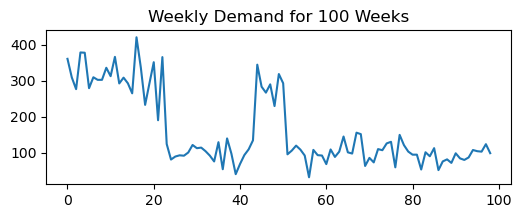

In [113]:
# Sanity check. Your plot will be different. Don't worry about reproducing this.
import pandas as pd
import matplotlib.pyplot as plt
s=pd.Series(generate_demand(100))
s.plot(title='Weekly Demand for 100 Weeks',figsize=(6,2))
plt.show()

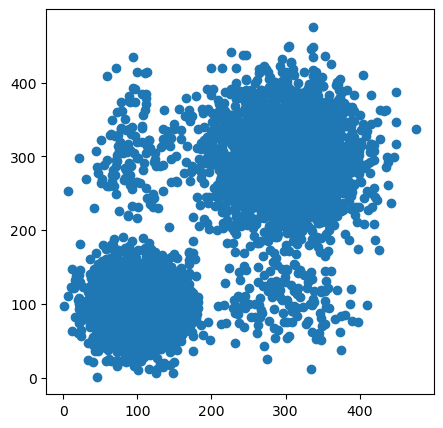

In [114]:
# Test code (your plot should look similar, but it won't be exactly the same due to randomness)
import matplotlib.pyplot as plt
d=generate_demand(5000)
plt.figure(figsize=(5,5))
plt.scatter(d[:-1],d[1:])
plt.show()

## Exercise 5.4: Simulating Willingness to Pay for Two Products

A firm sells two styles of headphones, which we refer to as Model 0 and Model 1. Based on a clustering analysis using historic data, the firm estimates that customers will come from three segments (A, B or C). In each segment, 

- the willingness to pay for Model 0 is normally distributed with mean $\mu_0$ and standard deviation $\sigma_0$; 
- the willingness to pay for Model 1 is normally distributed with mean $\mu_1$ and standard deviation $\sigma_1$, independent from the willingness to pay for Model 0.

The following table summarizes these parameters for each segment, as well as the probability that a randomly drawn customer comes from each of the three segments:

|Segment | $\mu_0$ | $\sigma_0$ | $\mu_1$ | $\sigma_1$ | Probability of Segment |
|--:|:--|:--|:--|:--|:--|
|A | 30 | 30 | 70 | 30 | 0.1 |
|B | 80 | 20 | 20 | 10 | 0.3 |
|C | -10 | 20 | -10 | 20 |0.6 |

As in the above table, a randomly chosen customer will be from segment A with 10\% probability, segment B with 30\% probability and segment C with 60\% probability. Segment A customers have high valuations for model 1, while segment B customers have high valuations for model 0. Segment C customers, which make up the majority, do not on average value either products. 

Write a function called "generateValuations" with one input argument:

- $n$: the number of customers to generate.

The function should return a pandas DataFrame representing the simulated valuations of $n$ randomly chosen customers. Each row represents a customer. There are three columns:

- **segment**: The segment of the customer, being "A", "B" or "C".
- **model_0**: The customer's maximum willingness to pay for Model 0.
- **model_1**: The customer's maximum willingness to pay for Model 1.

See the sample runs below for examples.

In [98]:
n = 6
segment_list = []
model_0 = []
model_1 = []
for i in range(n):
    segment = rng.choice(['A', 'B', 'C'], p = [0.1, 0.3, 0.6])
    segment_list.append(segment)
    if segment == 'A':
        model_0.append(rng.normal(30,30))
        model_1.append(rng.normal(70,30))
    elif segment == 'B':
        model_0.append(rng.normal(80,20))
        model_1.append(rng.normal(20,10))
    elif segment == 'C':
        model_0.append(rng.normal(-10,20))
        model_1.append(rng.normal(-10,20))
model_choice = pd.DataFrame([segment_list, model_0, model_1], columns=['Segment', 'Model 0', 'Model 1'])
print(model_choice)
     

ValueError: 3 columns passed, passed data had 6 columns

In [100]:
n = 6
array = []
for i in range(n):
    segment = rng.choice(['A', 'B', 'C'], p = [0.1, 0.3, 0.6])
    if segment == 'A':
        model_0 = rng.normal(30,30)
        model_1 = rng.normal(70,30)
    elif segment == 'B':
        model_0 = rng.normal(80,20)
        model_1 = rng.normal(20,10)
    elif segment == 'C':
        model_0 = rng.normal(-10,20)
        model_1 = rng.normal(-10,20)
    row = [segment, model_0, model_1]
    array.append(row)
model_choice = pd.DataFrame(array, columns=['Segment', 'Model 0', 'Model 1'])
print(model_choice)


  Segment    Model 0    Model 1
0       C   4.957207 -24.675458
1       C -25.764457  37.649803
2       C -51.697198   9.584520
3       B  97.785519  26.373189
4       B  90.227143  30.773330
5       B  89.786504  29.486720


In [104]:
# Write your code here

def generateValuations(n):
    array = []
    for i in range(n):
        segment = rng.choice(['A', 'B', 'C'], p = [0.1, 0.3, 0.6])
        if segment == 'A':
            model_0 = rng.normal(30,30)
            model_1 = rng.normal(70,30)
        elif segment == 'B':
            model_0 = rng.normal(80,20)
            model_1 = rng.normal(20,10)
        elif segment == 'C':
            model_0 = rng.normal(-10,20)
            model_1 = rng.normal(-10,20)
        row = [segment, model_0, model_1]
        array.append(row)
    model_choice = pd.DataFrame(array, columns=['segment', 'model_0', 'model_1'])
    return model_choice
    



In [107]:
# Showing the format of the generated table. Your numbers will be different.
generateValuations(6)

,segment,model_0,model_1
0,B,80.935039,-0.790589
1,C,2.155334,-2.854142
2,C,-18.595080,-10.952233
3,C,16.127442,-9.348228
4,C,3.306288,-25.832706
5,B,130.271248,7.351079


<Axes: title={'center': 'Scatter Plot of Willingness to Pay (10000 Customers).'}, xlabel='model_0', ylabel='model_1'>

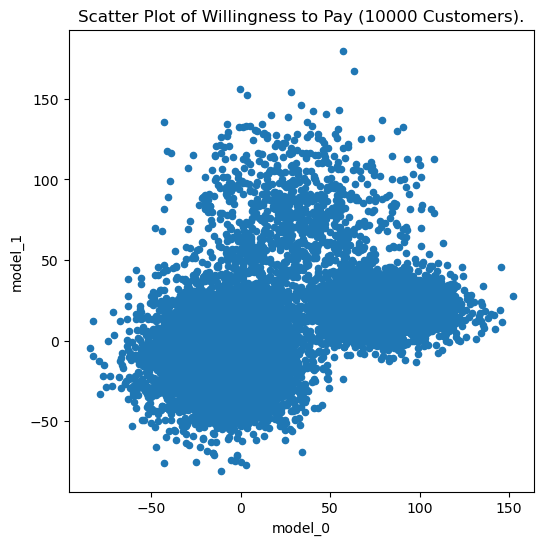

In [106]:
# Test code (your plot should look similar, but it won't be exactly the same due to randomness)
generateValuations(10000)\
.plot(x='model_0',y='model_1',kind='scatter',figsize=(6,6),\
     title='Scatter Plot of Willingness to Pay (10000 Customers).')

## Exercise 5.5: Epidemics Modeling

A new virus has broken out in a city and has an incubation period of $d=5$ days. Starting from $a=2$ days after infection to the last day of the incubation period, each infected patient has close contact with $n=4$ uninfected people per day, and infects each of them with probability $p=0.2$ independently from others. At the end of the last day of incubation, each infected person reports to the hospital and enters isolation, which means that they stop infecting others. 

**Create a function that simulates the number of patients who report to the hospital at the end of Day 1 through Day $m$.** The function should be called `simulateNewCases` and has the following input arguments:

- `m`: the number of days to simulate.
- `initial` (default value 1): the number of individuals who are newly infected on Day 0.
- `a` (default value 2): the first day after infection when a patient becomes contagious.
- `d` (default value 5): the last day after infection when a patient may infect others (not in isolation). 
- `n` (default value 4): the number of uninfected individuals a person has close contact with each day.
- `p` (default value 0.2): the probability of infecting each uninfected individual during a close contact. 

The function should return a list of $m$ integers, representing the number of infected individuals who exit incubation and report to the hospital at the end of Day 1 through Day $m$. 

To illustrate the timeline. Suppose that a person is infected on Day 5, then the person becomes contagious on Day $5+a=7$ and starting on that day, has the capacity to infect up to $n$ people per day. At the end Day $5+d=10$, after possibly infecting new people on that day, the patient reports to the hospital and enters into isolation.

**Solve this problem by applying the four steps of algorithmic thinking.**

**Step 1. Understand** (Write your summary of the task in this Markdown cell)




**Step 2. Decompose** (Write your instructions in this Markdown cell)






**Step 3. Analyze** (Write code fragments in separate code cells to implement the trickiest steps, as in Weeks 3 and 4.)

**Step 4. Synthesize** (Combine your code fragments from Step 3, but do so in an incremental fashion and print intermediate results)

In [1]:
# Version for debugging: with intermediate printing and no function encapsulation







In [121]:
# Final code: removing intermediate printing and encapuslating in a function

def simulateNewCases(m, initial = 1, a = 2, d = 5, n = 4, p = 0.2):
    totalReports = []
    newlyInfected = [initial]
    for day in range(1,m+1):
        if day < a:
            contagious = 0
        else:
            contagious = sum(newlyInfected[max(0, day-d): day-a+1])
        contacted = contagious * n
        newlyInfected.append(rng.binomial(contacted, p))
        
        if day < d:
            reports = 0
            totalReports.append(reports)
        else:
            reports = newlyInfected[day-d]
            totalReports.append(reports)
    return totalReports
                             





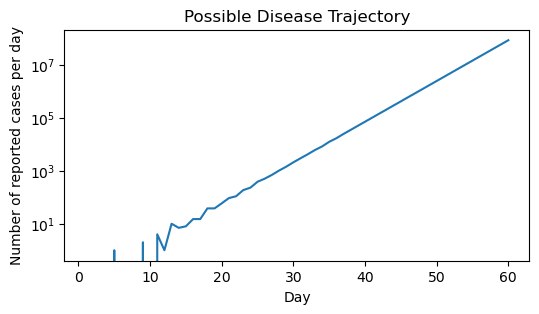

In [128]:
# Sanity check of one trajectory. Your plot will look different. Re-run to see a different trajectory.
import pandas as pd
import matplotlib.pyplot as plt
m=60
s=pd.Series(simulateNewCases(m),index=range(1,m+1))
s.plot(logy=True,title='Possible Disease Trajectory',figsize=(6,3))
plt.xlabel('Day')
plt.ylabel('Number of reported cases per day')
plt.show()

The following set of testing code uses your function to forecast the total number of reported cases within 60 days. Due to randomness, your output would not be exactly the same.

Number of total reported cases in 60 days.
	Forecast mean: 316560848
	Forecast standard deviation: 207505532


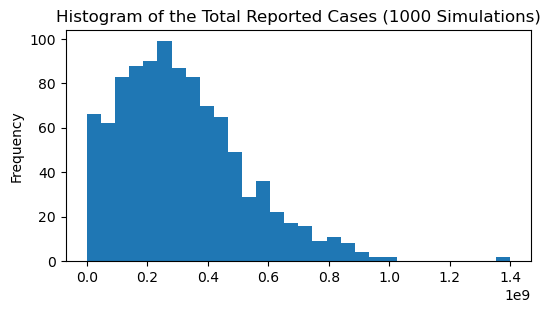

In [127]:
# Test code 1
import matplotlib.pyplot as plt
totalReports=pd.Series([sum(simulateNewCases(60)) for i in range(1000)])
print('Number of total reported cases in 60 days.')
print(f'\tForecast mean: {totalReports.mean():.0f}')
print(f'\tForecast standard deviation: {totalReports.std():.0f}')
totalReports.plot(kind='hist',bins=30,figsize=(6,3),\
                 title="Histogram of the Total Reported Cases (1000 Simulations)")
plt.show()

### Additional Test Cases

Here are some examples of potentially interesting analyses that uses the simulation model above.

#### i) Impact of the Incubation Period

What is the impact of the incubation period on the number of cases in the first 60 days?

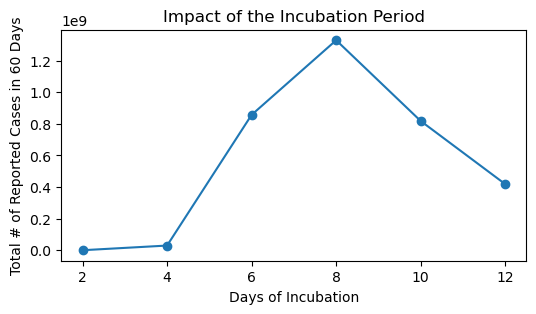

In [125]:
# Test code 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
numCases=pd.Series(dtype=float)
for d in range(2,13,2):
    meanPrediction=np.mean([sum(simulateNewCases(60,d=d)) for i in range(1000)])
    numCases.loc[d]=meanPrediction
numCases.plot(style='o-',title='Impact of the Incubation Period',figsize=(6,3))
plt.xlabel('Days of Incubation')
plt.ylabel('Total # of Reported Cases in 60 Days')
plt.show()

#### ii) Impact of Better Hygiene 

How does the expected total number of cases change based on $p$?

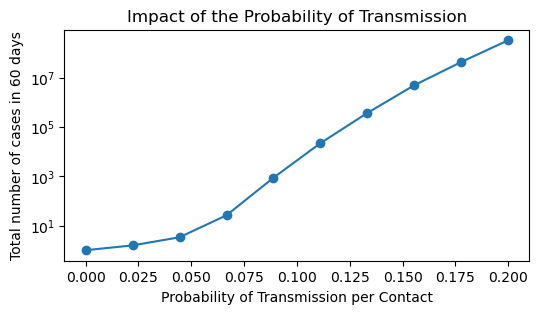

In [126]:
# Test code 3
import numpy as np
pList=np.linspace(0,0.2,10)
numCases=pd.Series(dtype=float)
for p in pList:
    numCases.loc[p]=np.mean([sum(simulateNewCases(60,p=p)) for i in range(1000)])
numCases.plot(style='o-',title='Impact of the Probability of Transmission',figsize=(6,3))    
plt.xlabel('Probability of Transmission per Contact')
plt.ylabel('Total number of cases in 60 days')
plt.yscale('log')
plt.show()

#### iii) Length of an Outbreak after Herd Immunity

Suppose that most people in the city have been vaccinated, so that the parameter $p$ is reduced by 5 fold to $0.04$. Moreover, the city has been case free for a while. However, on day 0, 3 new people become infected. How many days would this outbreak last? For simplicity, we say that the outbreak has ended if there are no hospital reports for 14 days.

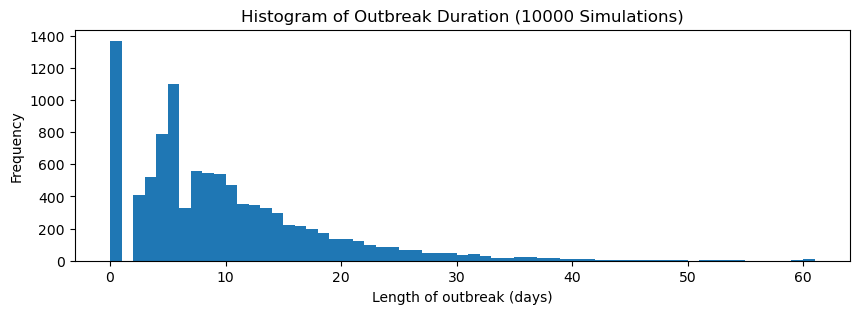

In [44]:
# Test code 4
import pandas as pd
import numpy as np
length=[]
for i in range(10000):
    reports=simulateNewCases(78,initial=3,p=0.04)
    noCaseDays=0
    endDay=61
    day=0
    for cases in reports:
        if cases==0:
            noCaseDays+=1
            if noCaseDays>=14:
                endDay=day-14-4
                break
        else:
            noCaseDays=0
        day+=1
    length.append(endDay)
pd.Series(length).plot(kind='hist',bins=61,\
        title='Histogram of Outbreak Duration (10000 Simulations)',figsize=(10,3))
plt.xlabel('Length of outbreak (days)')
plt.show()

## Exercise 5.6: Forecasting Bonus Earnings

Nadeem is a car salesperson who faces the following incentive scheme at the dealership where he works. For each month, there is a "target profit" of 80,000 that the dealership sets for the month. If he makes more profit for the dealership that month than the target, then he receives a 20% bonus on the amount of profit over the target. However, if he does not meet the target, he receives no bonus.  For example, if he makes 100,000 of profit, then he receives a 4,000 bonus that month: $(100000-80000)\times 0.2=4000$. However, if he makes 70,000, then he receives zero bonus that month. Nadeem would like to understand the distribution of his monthly bonus.

Nadeem estimates that the number of cars he sells is binomial distributed with $n=200$ and $p=0.2$. On every car he sells, the amount of profit he makes for the dealership is normally distributed with $\mu=3000$ and $\sigma=1000$, and the profit from each car is **independent** of another. This means that the profit for two different cars should be two independent draws of the normal distribution.

Create a `Series` called "monthlyBonus" with 100,000 samples of his monthly bonus. As in the sample outputs below, print the mean and the standard deviation rounded to the nearest integer, as well as the probability the bonus is less than 5000, with the probability being rounded to three decimal places. Finally, plot a histogram of simulated earnings with 100 bins.

**Note:** Given the inherent randomness with simulation, even if your cord is perfectly correct, the estimates will be slightly different from those shown below.

Mean bonus: 8009
Standard deviation: 3595
Probability that bonus is less than 5000: 0.207


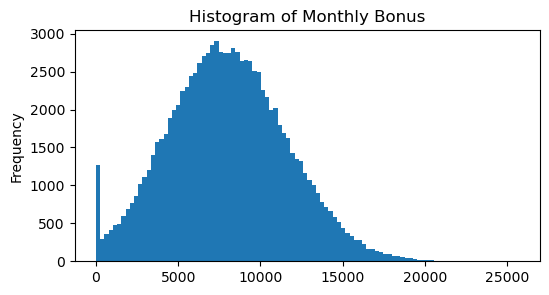

In [45]:
# Sample output

Mean bonus: 8012
Standard deviation: 3591
Probability that bonus is less than 5000: 0.206


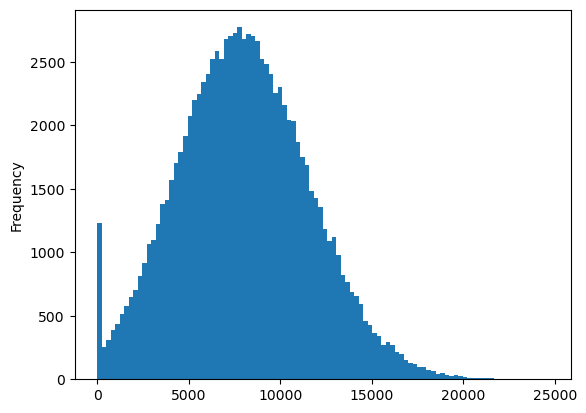

In [156]:
n = 100000
bonus = []
for month in range(n):
    monthly_profit = 0
    cars_sold = rng.binomial(200, 0.2)
    for car in range(cars_sold):
        profit = rng.normal(3000, 1000)
        monthly_profit += profit 
    
    if monthly_profit > 80000:
        bonus.append((monthly_profit - 80000) * 0.2)
    else:
        bonus.append(0)

  
mean_bonus = int(np.mean(bonus))
bonus_std = int(np.std(bonus))

count = 0
for i in range(len(bonus)):
    if bonus[i] < 5000:
        count+=1
bonus_prob = round(count/len(bonus), 3)
monthlyBonus = pd.Series(bonus)
monthlyBonus.plot(kind = 'hist', bins = 100)

print(f'Mean bonus: {mean_bonus}')
print(f'Standard deviation: {bonus_std}')
print(f'Probability that bonus is less than 5000: {bonus_prob}')

Mean bonus: 8011
Standard deviation: 3602
Probability that bonus is less than 5000: 0.206


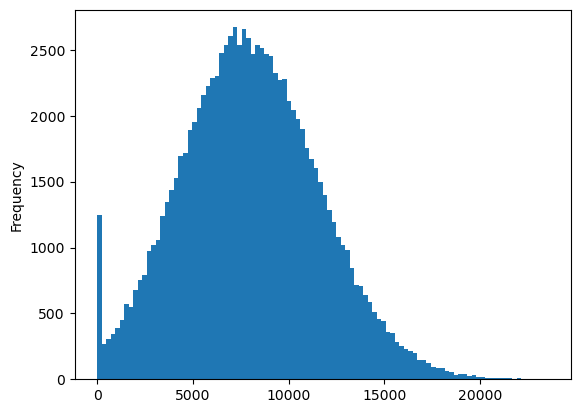

In [157]:
# Write your code here

n = 100000
bonus = []
for month in range(n):
    monthly_profit = 0
    cars_sold = rng.binomial(200, 0.2)
    for car in range(cars_sold):
        profit = rng.normal(3000, 1000)
        monthly_profit += profit 
    
    if monthly_profit > 80000:
        bonus.append((monthly_profit - 80000) * 0.2)
    else:
        bonus.append(0)

  
mean_bonus = int(np.mean(bonus))
bonus_std = int(np.std(bonus))

count = 0
for i in range(len(bonus)):
    if bonus[i] < 5000:
        count+=1
bonus_prob = round(count/len(bonus), 3)
monthlyBonus = pd.Series(bonus)
monthlyBonus.plot(kind = 'hist', bins = 100)

print(f'Mean bonus: {mean_bonus}')
print(f'Standard deviation: {bonus_std}')
print(f'Probability that bonus is less than 5000: {bonus_prob}')


## Exercise 5.7: Simulating Stock Prices

This question asks you to simulate the weekly price of a certain stock, given the initial price, the expected change in price per week, the standard deviation per week, and the number of weeks to simulate.

**Write a function called "simulatePrice" with the following input arguments:**

- **initial**: a positive number representing the price in Week 0.
- **mu**: the expected change in price from one week to the next.
- **sigma**: the standard deviation in the change in price.
- **N**: the number of weeks to simulate. This does not include Week 0, for which the price is already given.

The function should return a Pandas Series containing the simulated price of the stock from Week 0 through N. (Note that the initial price is the first entry and is not simulated.) 

You should assume the following probabilistic model. Suppose the price in week $t-1$ is $p_{t-1}$, then the price in week $t$ is given by

$$p_t = \begin{cases}
0 & \text{ if $p_{t-1} =0$, } \\
\max(0, p_{t-1}+\epsilon_t) & \text{ if $p_{t-1} > 0 $,}
\end{cases}$$
where $\epsilon_t$ is independently and Normally distributed with mean **mu** and standard deviation **sigma**, as given by the input arguments.

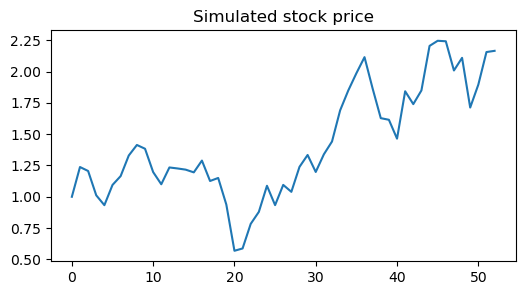

In [159]:
initial = 1
mu = 0.01
sigma = 0.2
n = 52
price = [initial]
for week in range(n):
    if price[-1] == 0:
        price.append(0)
    elif price[-1] > 0:
        e = rng.normal(mu, sigma)
        price.append(max(0, price[-1]+e))
stock_price = pd.Series(price)
stock_price.plot(title = 'Simulated stock price', figsize=(6,3))
plt.show()

In [160]:
# Write your function here
def simulatePrice(initial, mu, sigma, N):
    price = [initial]
    for week in range(N):
        if price[-1] == 0:
            price.append(0)
        elif price[-1] > 0:
            e = rng.normal(mu, sigma)
            price.append(max(0, price[-1]+e))
    stock_price = pd.Series(price)
    return stock_price





The following plots one random sequence of 52 weeks.

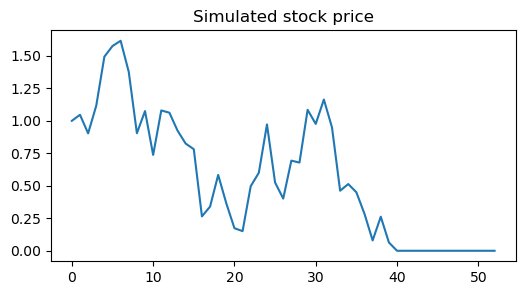

In [163]:
# Sanity check. Don't worry about exactly reproducing this plot. Re-run for a different sequence.
import matplotlib.pyplot as plt
simulatePrice(1,0.01,0.2,52).plot(title='Simulated stock price',figsize=(6,3))
plt.show()

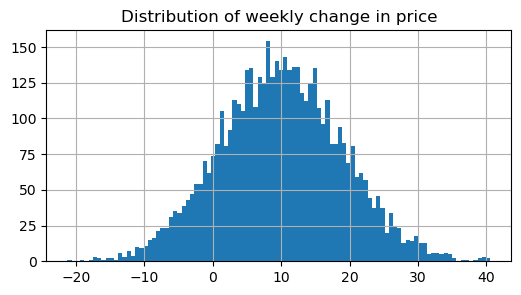

In [165]:
# Test code 1
import matplotlib.pyplot as plt
import numpy as np
s=simulatePrice(10000,10,9,5000)
s.diff(1).hist(bins=100,figsize=(6,3))
plt.title('Distribution of weekly change in price')
plt.show()

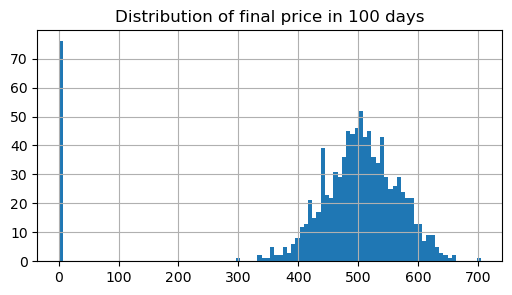

In [166]:
# Test code 2
import matplotlib.pyplot as plt
import numpy as np
end=pd.Series(simulatePrice(5,5,6,100).iloc[-1] for i in range(1000))
end.hist(bins=100,figsize=(6,3))
plt.title('Distribution of final price in 100 days')
plt.show()

## Exercise 5.8: Simulating a Strategy for Stock Trading

This question asks you to evaluate an algorithmic trading strategy using a time series of stock prices, similar to the output in Q2.

**Write a function called "simulateTrades" with the following input arguments:**

- **prices**: a pandas Series of stock prices, with each entry representing the price of the stock in a given week. You can assume that all given prices are non-negative (i.e. $\ge 0$).
- **cash**: a positive decimal number designating the total amount of money you have at the very beginning, before any trades occur in Week 0. You use up cash when buying stocks and gain cash when selling stocks.
- **p_L**: a threshold on the price to purchase. As soon as the stock price is less than or equal to this price, assuming that the price is non-zero, you would purchase as many shares as you can using all the cash you have. (**Note: you can only purchase an integer number of shares.** You can round down a number $n$ using the code `int(n)`. i.e., `int(3.6)` would yield 3.) If the price is equal to zero, then you would not purchase.
- **p_H**: a threshold on the price to sell. As soon as the stock price is greater than or equal to this price, you would sell all the shares you have and convert it to cash. 

Assume that at the beginning, you have zero shares of the stock. Moreover, in the last week, you have to sell all the shares you have regardless of the price. **The function should return (not print) the total amount of cash you have at the end of all periods.** 

For example, suppose that `prices=pd.Series([1.1,1.3,0.8,1.3,1.6,0.4])`. Then

- `simulateTrades(prices, 8, 0.8, 1.6)` returns 16.0 because you would buy 10 shares when the price hits 0.8 and sell then for 1.6 each when the price reaches 1.6. In the last period, you buy 40 shares at 0.4 but sell everything again at that price, so your cash doesn't change.
- `simulateTrades(prices, 8, 0.8, 1.7)` returns 4.0 because while the sell price of 1.7 is never reached, you are stuck with 10 shares, which you are forced to sell in the last period for 0.4 each.
- `simulateTrades(prices, 10, 0.8, 1.6)` returns 19.6 because you buy 12 shares when the price reaches 0.8, with 0.4 cash left, and you sell all 12 shares at a price of 1.6. Your ending cash is $0.4+1.6 \times 12=19.6$.
- `simulateTrades(prices, 8, 0.7, 1.6)` returns 8.0 because the price is never low enough for you to buy, so you end up with the same amount of cash you had at the beginning.
- `simulateTrades(prices, 8, 0.8, 1.2)` returns 13.0 because you buy the 10 shares when the price hits 0.8 and sell everything when the price hits 1.3.
- `simulateTrades(prices, 11, 1.2, 1.3)` returns 21.0 because you immediately buy 10 shares since the opening price of 1.1 is lower than 1.2. You sell these shares when the price hits 1.3, and now you have 13 dollars of cash. Once the price goes down to 0.8, you buy 16 shares, and have 0.2 in cash left. You sell those 16 shares when the price hits 1.3, so the final cash is $0.2+16 \times 1.3 = 21.0$.

In [170]:
prices = pd.Series([1.1,1.3,0.8,1.3,1.6,0.4])
cash = 8
p_L = 0.8
p_H = 1.6
stock = 0

for price in prices:
    if price <= p_L:
        bought = int(cash/price)
        stock+=bought
        cash -= (bought*price)
    if price >= p_H:
        cash += stock * price
        stock = 0

if type(prices) == pd.Series:
    cash+= prices.iloc[-1] * stock
else:
    cash+=prices[-1]
print(cash)
        

16.0


In [192]:
# Write your function here

def simulateTrades(prices, cash, p_L, p_H):
    stock = 0
    for price in prices:
        if price <= p_L:
            bought = int(cash/price)
            stock+=bought
            cash -= (bought*price)
        if price >= p_H:
            cash += stock * price
            stock = 0

    if type(prices) == pd.Series:
        cash+= prices.iloc[-1] * stock
    else:
        cash+=prices[-1] * stock
    return cash




In [177]:
# Sample runs
import pandas as pd
prices=pd.Series([1.1,1.3,0.8,1.3,1.6,0.4])
simulateTrades(prices, 8, 0.8, 1.6)

16.0

In [176]:
simulateTrades(prices, 8, 0.8, 1.7)

4.0

In [178]:
simulateTrades(prices, 10, 0.8, 1.6)

19.6

In [179]:
simulateTrades(prices, 8, 0.7, 1.6)

8.0

In [190]:
print(simulateTrades(prices, 8, 0.8, 1.2))

13.0


In [180]:
print(simulateTrades(prices, 8, 0.8, 1.2))

13.0


In [181]:
print(simulateTrades(prices, 11, 1.2, 1.3))

21.0


In [197]:
simulateTrades(pd.Series([5.0,3,8,10,3,10,6,8,11,8,6,3,1,8]), 100,9, 4)

2360.0

In [193]:
simulateTrades([5.0,3,8,10,3,10,6,8,11,8,6,3,1,8,1], 100,9, 4)

2360.0

In [58]:
simulateTrades([5.0,3,8,10,3,10,6,8,11,8,6,3,1,8,1], 100,9, 4)

153.0

In [199]:
simulateTrades([5.0,3,8,10,3,10,6,8,11,8,6,3,1,8,1,10], 100,9, 4)

23600.0

In [59]:
simulateTrades([5.0,3,8,10,3,10,6,8,11,8,6,3,1,8,1,10], 100,9, 4)

1530.0

### Additional Test Code: Combining Exercise 5.7 and 5.8 into One Simulation Model

Once you have finshed Exercise 5.7 and 5.8, the following code illustrates how you can combine them to forecast the performance of the trading strategy, given the parameters initial, mu, sigma, N, cash, p_L and p_H. Your graph would not be exactly as follows but the shape should be similar, otherwise there is probably an error.

Mean: 10844.993015911929
Standard deviation: 5437.075200859241


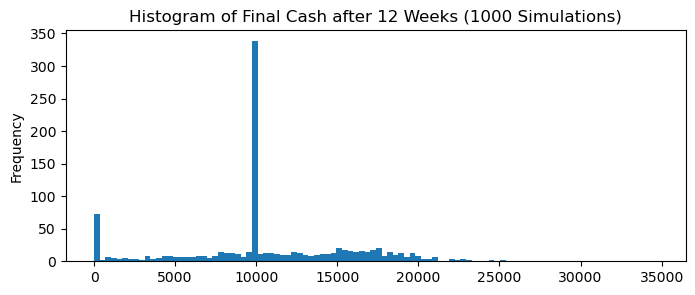

In [60]:
# You should be able to reproduce the plot qualitatively, but your plot may be slightly different due to randomness
import matplotlib.pyplot as plt

initial=1
mu=0.01
sigma=0.2
N=12     
cash=10000
p_L=0.9
p_H=1.3

# Combining Exercises 5.7 and 5.8
finalCash=pd.Series(dtype=float)
for i in range(1000):
    prices=simulatePrice(initial,mu,sigma,N)
    finalCash.loc[i]=simulateTrades(prices,cash,p_L,p_H)
finalCash.plot(kind='hist',title='Histogram of Final Cash after 12 Weeks (1000 Simulations)',bins=100,figsize=(8,3))
print('Mean:', finalCash.mean())
print('Standard deviation:', finalCash.std())
plt.show()

In [53]:
x = [6,8,4,6,10]
z = [9,9,9,9,9]
print('x\ty\tz\ta\tb')
print('-\t0\t-\t0\t0')
y = 0
a = 0
b = 0
for i in range(len(x)):
    y = x[i] + b
    if y >= z[i]:
        a = 1
    else:
        a = 0
        
    if a ==1:
        b = y - z[i]
    else:
        b = y
    print(f'{x[i]}\t{y}\t{z[i]}\t{a}\t{b}')

x	y	z	a	b
-	0	-	0	0
6	6	9	0	6
8	14	9	1	5
4	9	9	1	0
6	6	9	0	6
10	16	9	1	7


In [54]:
def process(x,z):
    print('x\ty\tz\ta\tb')
    print('-\t0\t-\t0\t0')
    y = 0
    a = 0
    b = 0
    for i in range(len(x)):
        y = x[i] + b
        if y >= z[i]:
            a = 1
        else:
            a = 0
            
        if a ==1:
            b = y - z[i]
        else:
            b = y
        print(f'{x[i]}\t{y}\t{z[i]}\t{a}\t{b}')

In [55]:
process([5,6,9,8,7,8,4],[10,10,15,15,10,10,10])

x	y	z	a	b
-	0	-	0	0
5	5	10	0	5
6	11	10	1	1
9	10	15	0	10
8	18	15	1	3
7	10	10	1	0
8	8	10	0	8
4	12	10	1	2
